In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données enrichies
df = pd.read_csv('../data/processed/walmart_enriched.csv')
df['Date'] = pd.to_datetime(df['Date'])

print(f"Données chargées: {len(df):,} enregistrements")
print("Création du dashboard final...")

Données chargées: 6,435 enregistrements
Création du dashboard final...


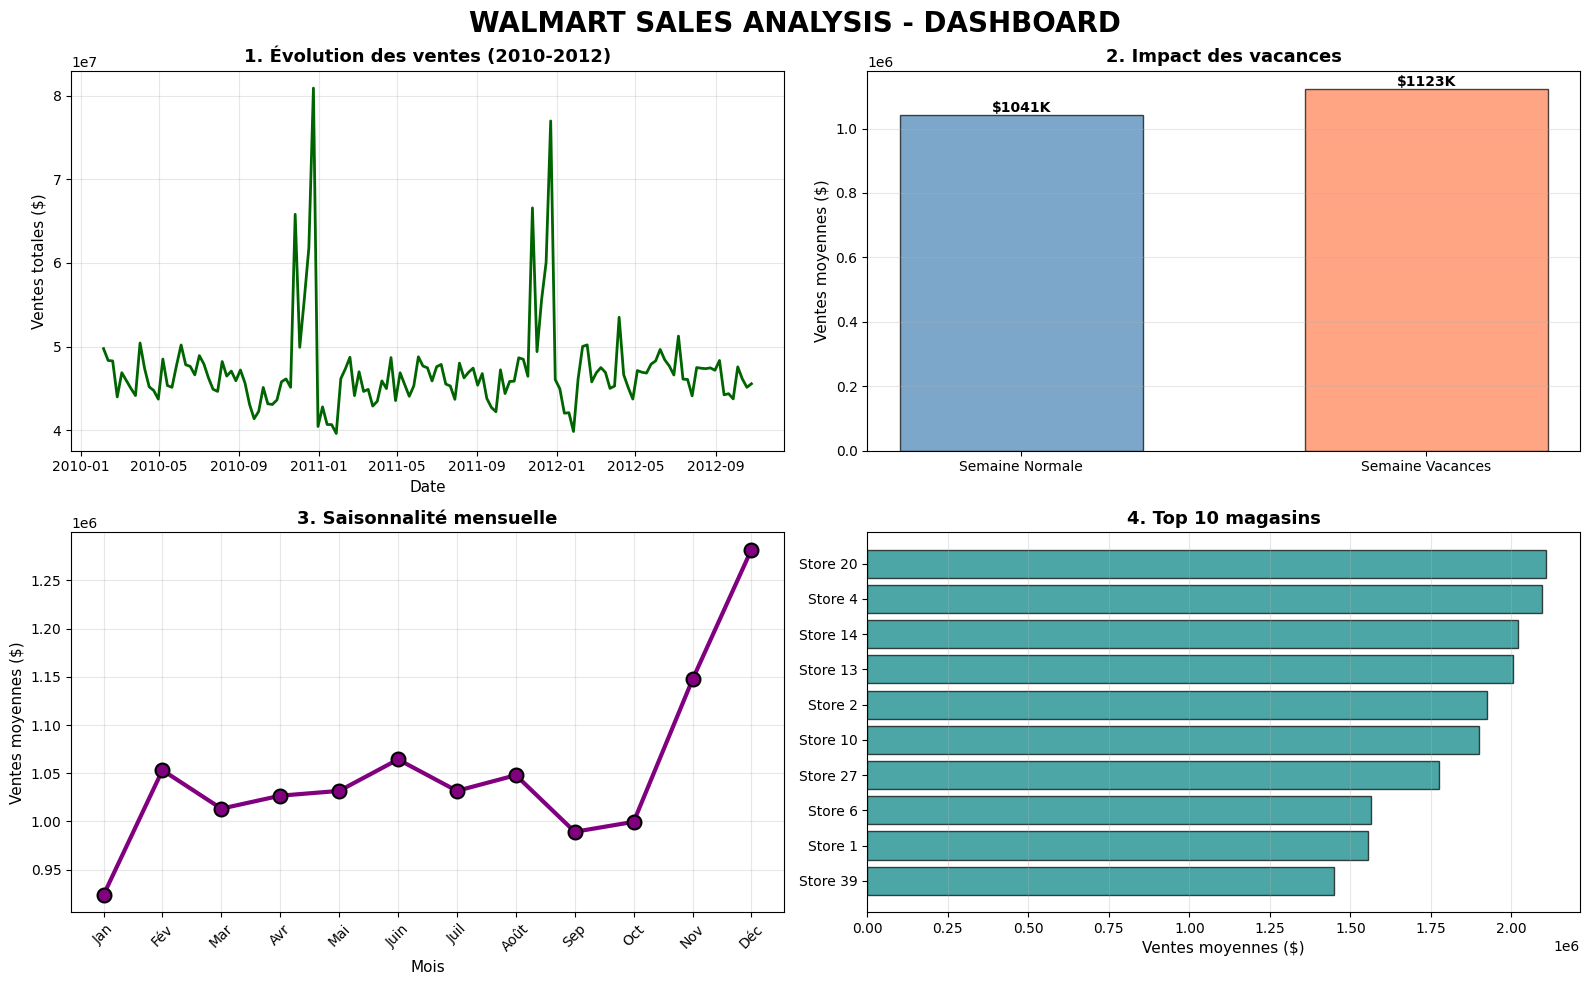

In [7]:
# Dashboard simplifié - 4 visualisations essentielles
fig = plt.figure(figsize=(16, 10))
fig.suptitle('WALMART SALES ANALYSIS - DASHBOARD', 
             fontsize=20, fontweight='bold', y=0.98)

month_names = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 
               'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc']

# 1. Évolution temporelle
ax1 = plt.subplot(2, 2, 1)
sales_timeline = df.groupby('Date')['Weekly_Sales'].sum()
ax1.plot(sales_timeline.index, sales_timeline.values, linewidth=2, color='darkgreen')
ax1.set_xlabel('Date', fontsize=11)
ax1.set_ylabel('Ventes totales ($)', fontsize=11)
ax1.set_title('1. Évolution des ventes (2010-2012)', fontweight='bold', fontsize=13)
ax1.grid(alpha=0.3)

# 2. Impact des vacances
ax2 = plt.subplot(2, 2, 2)
holiday_avg = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
bars = ax2.bar(['Semaine Normale', 'Semaine Vacances'], holiday_avg.values, 
               color=['steelblue', 'coral'], alpha=0.7, edgecolor='black', width=0.6)
for i, v in enumerate(holiday_avg.values):
    ax2.text(i, v, f'${v/1000:.0f}K', ha='center', va='bottom', fontweight='bold', fontsize=10)
ax2.set_ylabel('Ventes moyennes ($)', fontsize=11)
ax2.set_title('2. Impact des vacances', fontweight='bold', fontsize=13)
ax2.grid(alpha=0.3, axis='y')

# 3. Saisonnalité mensuelle
ax3 = plt.subplot(2, 2, 3)
monthly = df.groupby('Month')['Weekly_Sales'].mean()
ax3.plot(range(1, 13), monthly.values, marker='o', linewidth=3, 
         markersize=10, color='purple', markeredgecolor='black', markeredgewidth=1.5)
ax3.set_xlabel('Mois', fontsize=11)
ax3.set_ylabel('Ventes moyennes ($)', fontsize=11)
ax3.set_title('3. Saisonnalité mensuelle', fontweight='bold', fontsize=13)
ax3.set_xticks(range(1, 13))
ax3.set_xticklabels(month_names, rotation=45)
ax3.grid(alpha=0.3)

# 4. Top 10 magasins
ax4 = plt.subplot(2, 2, 4)
top10 = df.groupby('Store')['Weekly_Sales'].mean().nlargest(10)
ax4.barh(range(len(top10)), top10.values, color='teal', alpha=0.7, edgecolor='black')
ax4.set_yticks(range(len(top10)))
ax4.set_yticklabels([f'Store {s}' for s in top10.index])
ax4.set_xlabel('Ventes moyennes ($)', fontsize=11)
ax4.set_title('4. Top 10 magasins', fontweight='bold', fontsize=13)
ax4.invert_yaxis()
ax4.grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('../visualizations/dashboard_complet.png', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
# Calculer les chiffres clés pour le rapport
print("RÉSUMÉ DES INSIGHTS POUR LE RAPPORT")
print("="*50)

# Impact vacances
holiday_avg = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()
holiday_increase = ((holiday_avg[1] / holiday_avg[0]) - 1) * 100
print(f"\nImpact vacances: +{holiday_increase:.1f}%")

# Meilleur/pire mois
month_names = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 
               'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc']
monthly_avg = df.groupby('Month')['Weekly_Sales'].mean()
best_month_idx = monthly_avg.idxmax()
worst_month_idx = monthly_avg.idxmin()
print(f"Meilleur mois: {month_names[best_month_idx-1]} (${monthly_avg.max():,.0f})")
print(f"Pire mois: {month_names[worst_month_idx-1]} (${monthly_avg.min():,.0f})")

# Corrélation la plus forte
corr = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()['Weekly_Sales'][1:]
strongest = corr.abs().idxmax()
print(f"Corrélation la plus forte: {strongest} ({corr[strongest]:.3f})")

# Top magasin
top_store = df.groupby('Store')['Weekly_Sales'].mean().idxmax()
top_sales = df.groupby('Store')['Weekly_Sales'].mean().max()
print(f"Meilleur magasin: Store {top_store} (${top_sales:,.0f}/semaine)")

# Stats générales
print(f"\nStatistiques générales:")
print(f"Total magasins: {df['Store'].nunique()}")
print(f"Ventes moyennes: ${df['Weekly_Sales'].mean():,.0f}")
print(f"Ventes totales: ${df['Weekly_Sales'].sum():,.0f}")

RÉSUMÉ DES INSIGHTS POUR LE RAPPORT

Impact vacances: +7.8%
Meilleur mois: Déc ($1,281,864)
Pire mois: Jan ($923,885)
Corrélation la plus forte: Unemployment (-0.106)
Meilleur magasin: Store 20 ($2,107,677/semaine)

Statistiques générales:
Total magasins: 45
Ventes moyennes: $1,046,965
Ventes totales: $6,737,218,987
